<a href="https://colab.research.google.com/github/toche7/MLPython1Day/blob/main/Lab4_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 K-Mean Clustering
ver: 001


อีกประเภทหนึ่งของ Machine Learning ก็คือ Unservised Learning  หรือการเรียนรู้แบบไม่มีผู้สอนโดยในกลุ่มนี้จะไม่ได้มีวัตถุประสงค์ในการทำนายหรือคาดการณ์คำตอบ แต่โดยส่วนใหญ่จะเป็นเรื่องของการเตรียม ข้อมูล อาทิ การแบ่งกลุ่มข้อมูล การลดมิติข้อมูล หรือการตรวจจับความผิดปกติของข้อมูล สำหรับเนื้อหาในบทนี้ในส่วนนี้เราจะยกตัวอย่างโดยการใช้เทคนิค K-mean ในการแบ่งกลุ่มข้อมูลหรือ Clustering  ดังจะได้แสดงให้เห็นดังต่อไปนี้


K-mean เป็นเทคนิคในการแบ่งข้อมูลออกเป็นกลุ่ม ๆ โดยจำนวนกลุ่มจะถูกแบ่งออกเป็น K กลุ่มด้วยกัน โดยหลักการของ k-mean นั้นจะใช้เทคนิคการวัดระยะห่าง จากตัวข้อมูลนั้นๆไปยังเจุดศูนย์กลางกลุ่มข้อมูล โดยจำนวนกลุ่มข้อมูลจะต้องมีการกำหนดขึ้นมาก่อนว่าจะมีกี่ตัวอย่างเช่นกำหนดเป็น 2  กลุ่ม k ก็จะเท่ากับ 2 ถ้ากำหนดเป็น 3 กลุ่มเขตก็จะเท่ากับ 3 เป็นต้น


Model Theory
https://scikit-learn.org/stable/modules/clustering.html#k-means

Library Details
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


```
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_
```



| Method | Description |
| :------------ | :---------------------------------------------------------- |
| fit\(X \) | ทำการ Train Model เพื่อแบ่ง cluster |
|labels_ | รายการ cluster ที่กำกับข้อมูลในแต่ละแถว  |




## K-means Clustering of the forest fires

ในการทดลองนี้เราจะได้ทำการแบ่งข้อมูลที่ Sensor ที่วัดจากป่าที่ประกอบด้วยค่าอุณหภูมิ (Temperature) ความชื้น (Humidity) และข้อมูลจะประวัติการเกิดไฟไหม้ (Fires) ด้วย แต่ในกรณีนี้เราจะไม่ได้นข้อมูลจะประวัติการเกิดไฟไหม้มาใช้งาน

ในการใช้งาน Python กรณีเราต้องใช้ Library ภายนอกมาใช้งานเราต้องทำการนำเข้า Library นั้นด้วยคำสั่ง Import ตาม Cell ด้านล่างนี้


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


###  Load Data

ทำการโหลดข้อมูลจากไฟล์ csv ไปเก็บไว้ใน df ซึ่งเป็นข้อมูลประเภท Dataframe ของ library Pandas <br>
กรณีที่อยากโหลดข้อมูลจากเวปไซท์โดยตรงแล้วมาเก็บไว้ในเครื่องให้เอา comment ของบรรทัด wget ออกก็จะเป็นการโหลดข้อมูลจากเวปมา save เป็นไฟล์ชื่อว่า forest_fires.csv

In [3]:
!wget https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv?dl=0 -O forest_fires.csv
df = pd.read_csv("forest_fires.csv")

--2024-10-11 10:48:55--  https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv?dl=0
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189 [text/plain]
Saving to: ‘forest_fires.csv’

forest_fires.csv    100%[===================>]     189  --.-KB/s    in 0s      

2024-10-11 10:48:55 (3.49 MB/s) - ‘forest_fires.csv’ saved [189/189]



In [4]:
df.head()

,Temperature,Humidity,Fires
0,22.8,40,No
1,29.6,27,Yes
2,17.8,51,No
3,19.3,38,No
4,28.6,27,Yes


### Plot Graph

ทำการ plot graph เพื่อดูการกระจายของข้อมูลด้วยวิธีการ Library Pandas เปรียบเทียบ matplotlib

#### Plot graph using Pandas

<Axes: xlabel='Temperature', ylabel='Humidity'>

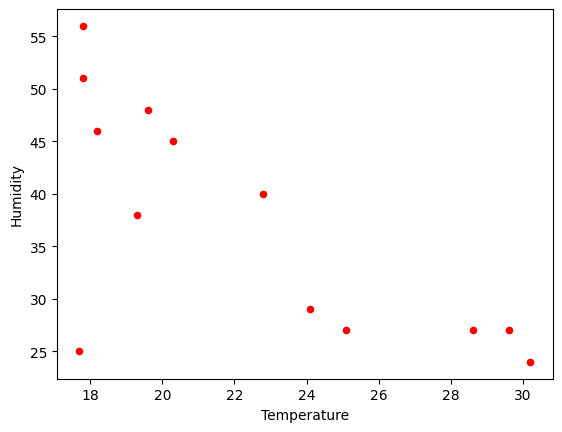

In [5]:
df.plot.scatter(x='Temperature', y='Humidity', c='Red')

### Training K-Means
ทำการ clustering ข้อมูลด้วยวิธีการ K-means ด้วย Library Scikit-Learn

In [6]:
from sklearn.cluster import KMeans
import numpy as np
X = df[['Temperature', 'Humidity']]
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
print("labels : ",  kmeans.labels_)

labels :  [0 1 0 0 1 0 1 0 1 1 0 1 0]


In [7]:
for i, center in enumerate(kmeans.cluster_centers_):
  print("center %d:" %i, center)

center 0: [19.4        46.28571429]
center 1: [25.88333333 26.5       ]


In [8]:
X['label'] = kmeans.labels_
X

,Temperature,Humidity,label
0,22.8,40,0
1,29.6,27,1
2,17.8,51,0
3,19.3,38,0
4,28.6,27,1
5,17.8,56,0
6,17.7,25,1
7,18.2,46,0
8,25.1,27,1
9,30.2,24,1


In [9]:
X[X['label'] == 1]['Temperature']

,Temperature
1,29.6
4,28.6
6,17.7
8,25.1
9,30.2
11,24.1


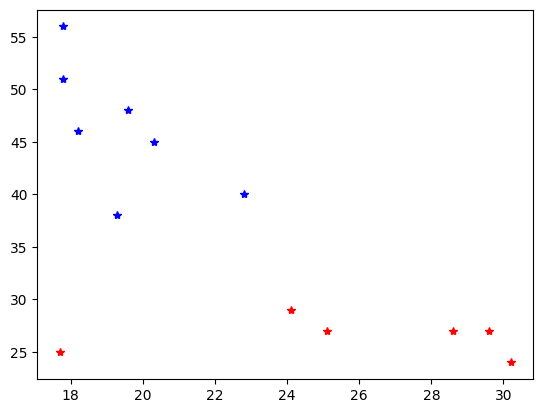

In [10]:
plt.plot(X[X['label'] == 1]['Temperature'],X[X['label'] == 1]['Humidity'], '*r')
plt.plot(X[X['label'] == 0]['Temperature'],X[X['label'] == 0]['Humidity'], '*b')


<Axes: xlabel='Temperature', ylabel='Humidity'>

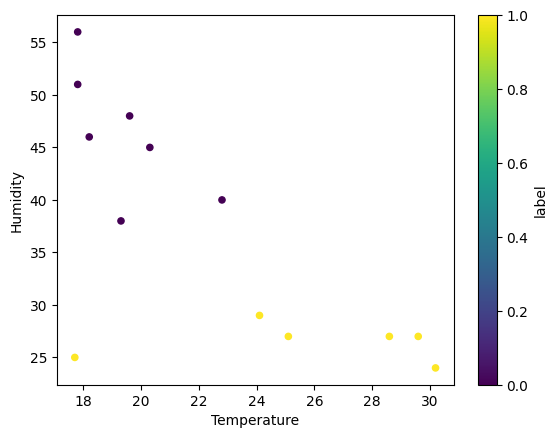

In [11]:
X.plot.scatter('Temperature','Humidity', c = 'label', colormap='viridis')

K-Mean Mesurement Matrix

In [12]:
from sklearn import metrics
metrics.silhouette_score(X, kmeans.labels_)

0.6453714578989221

In [13]:
X

,Temperature,Humidity,label
0,22.8,40,0
1,29.6,27,1
2,17.8,51,0
3,19.3,38,0
4,28.6,27,1
5,17.8,56,0
6,17.7,25,1
7,18.2,46,0
8,25.1,27,1
9,30.2,24,1


In [14]:
kmeans.inertia_

374.4969047619047

In [15]:
kmeans.score(X[['Temperature', 'Humidity']])

-374.49690476190466

### Elbow method

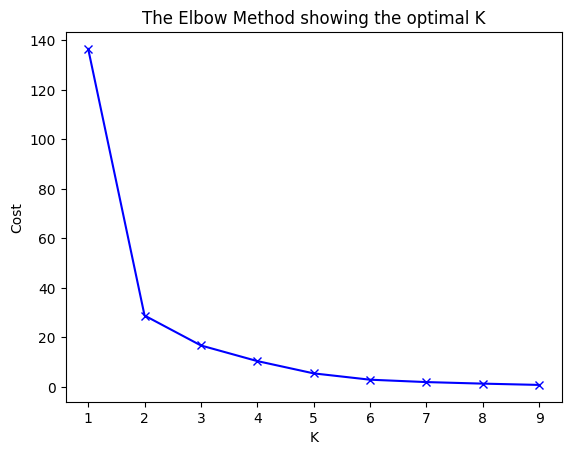

In [16]:
from sklearn import metrics
# k means determine k
silScore = []
cost = []
K = range(1,10)
X = df[['Temperature', 'Humidity']]
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeans = kmeanModel.fit(X)
    cost.append(kmeans.inertia_/ X.shape[0])
    if k > 1 : silScore.append(metrics.silhouette_score(X, kmeans.labels_))
    # print("labels : ",  kmeans.labels_)


# Plot the elbow
plt.plot(K, cost, 'bx-')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal K')
plt.show()

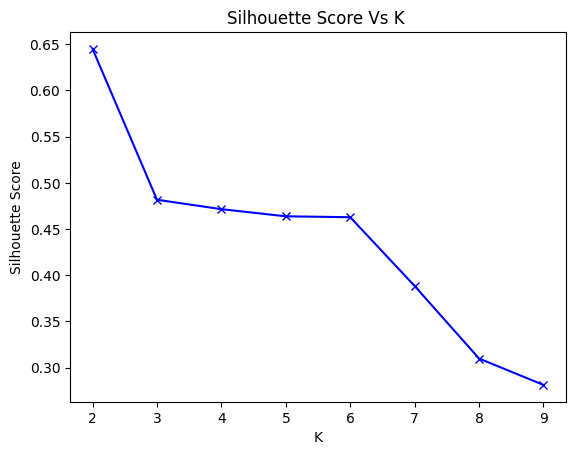

In [17]:
# Plot the elbow
plt.plot(K[1:], silScore, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Vs K ')
plt.show()

In [18]:
X

,Temperature,Humidity
0,22.8,40
1,29.6,27
2,17.8,51
3,19.3,38
4,28.6,27
5,17.8,56
6,17.7,25
7,18.2,46
8,25.1,27
9,30.2,24


In [19]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

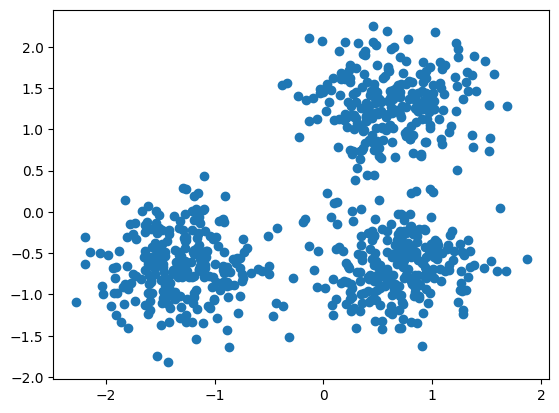

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [21]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
print("labels : ",  kmeans.labels_)

labels :  [0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 1 

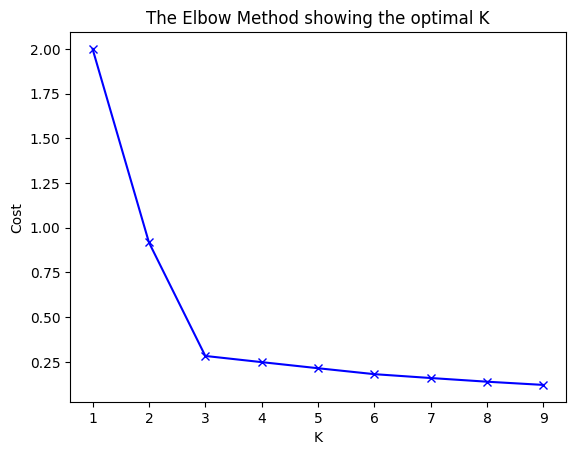

In [22]:

cost = []
silScore = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(X)
    kmeans = kmeanModel.fit(X)
    cost.append(kmeans.inertia_/ X.shape[0])
    if k > 1 : silScore.append(metrics.silhouette_score(X, kmeans.labels_))
    #print("labels : ",  kmeans.labels_)


# Plot the elbow
plt.plot(K, cost, 'bx-')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal K')
plt.show()

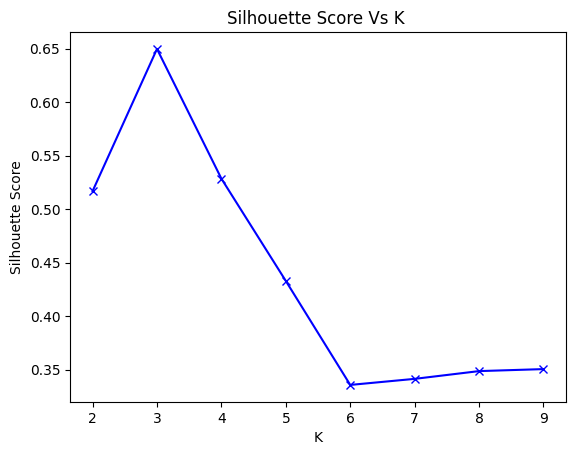

In [23]:
# Plot the elbow
plt.plot(K[1:], silScore, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Vs K ')
plt.show()